# Interaktive Visualisierung erstellen

### module importieren

In [2]:
from nilearn import image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interact_manual

### Dateiname des strukturellen Bildes

In [2]:
mpr_file = '../data/sub-01_T1w_space-MNI152NLin2009cAsym_preproc.nii.gz'

In [3]:
mpr_file

'../data/sub-01_T1w_space-MNI152NLin2009cAsym_preproc.nii.gz'

### Daten aus Bild auslesen

In [4]:
mpr_img = image.load_img(mpr_file)

In [5]:
mpr_img

### Voxelwerte auslesen

In [6]:
mpr_data = mpr_img.get_data()

In [7]:
mpr_data.shape

(193, 229, 193)

### eine Schicht auswählen

In [8]:
one_slice = mpr_data[100,:,:]

In [9]:
one_slice

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### in Tabelle umwandeln

In [10]:
one_slice_df = pd.DataFrame(one_slice)

In [11]:
one_slice_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Voxelwerte visualisieren

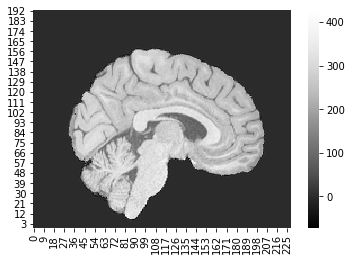

In [12]:
sns.heatmap(one_slice_df.T[::-1],square=True,cmap='Greys_r')

### interaktive Visualisierung

In [13]:
def viewer_tool(my_slice):
    one_slice = mpr_data[my_slice,:,:]
    one_slice_df = pd.DataFrame(one_slice)
    sns.heatmap(one_slice_df.T[::-1],square=True,cmap='Greys_r')
    return

In [14]:
interact_manual( viewer_tool, my_slice=(0,192) );

interactive(children=(IntSlider(value=96, description='my_slice', max=192), Button(description='Run Interact',…

### in allen drei Raumrichtungen

In [15]:
def my_viewer_tool(x,y,z):
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,6))
    
    
    one_slice = mpr_data[x,:,:]
    
    slice_df = pd.DataFrame(one_slice)
    sns.heatmap(slice_df.T[::-1],square=True,cmap='Greys_r',cbar=None,ax=ax1)
    
    ax1.axvline(y)
    ax1.axhline(mpr_data.shape[2]-z)
    
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    
    one_slice = mpr_data[:,y,:]
    
    slice_df = pd.DataFrame(one_slice)
    sns.heatmap(slice_df.T[::-1],square=True,cmap='Greys_r',cbar=None,ax=ax2)
    
    ax2.axvline(x)
    ax2.axhline(mpr_data.shape[2]-z)
    
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    
    one_slice = mpr_data[:,:,z]
    
    slice_df = pd.DataFrame(one_slice)
    sns.heatmap(slice_df.T[::-1],square=True,cmap='Greys_r',cbar=None,ax=ax3)
    
    ax3.axvline(x)
    ax3.axhline(mpr_data.shape[1]-y)

    ax3.set_xticks([])
    ax3.set_yticks([])

    
    plt.show()

In [16]:
interact_manual(my_viewer_tool,
                x=(0,mpr_data.shape[0]-1),
                y=(0,mpr_data.shape[1]-1),
                z=(0,mpr_data.shape[2]-1));

interactive(children=(IntSlider(value=96, description='x', max=192), IntSlider(value=114, description='y', max…